In [1]:
import numpy as np
import matplotlib.pyplot as plt
import rasterio
import rioxarray
import scipy

In [4]:
with rasterio.open('merged_usa_pred_full_original.tif') as src:
    original_pred = src.read()
    metadata = {
                'count': src.count,           # Number of bands
                'width': src.width,
                'height': src.height,
                'dtype': src.dtypes[0],
                'crs': src.crs,
                'transform': src.transform,
                'bounds': src.bounds,
                'nodata': src.nodata
            }
    print(f"✓ Loaded with rasterio: {original_pred.shape} ({metadata['dtype']})")
    print(f"  Bands: {metadata['count']}, Size: {metadata['width']}x{metadata['height']}")
    print(f"  CRS: {metadata['crs']}")

✓ Loaded with rasterio: (13, 242, 333) (uint8)
  Bands: 13, Size: 333x242
  CRS: EPSG:32614


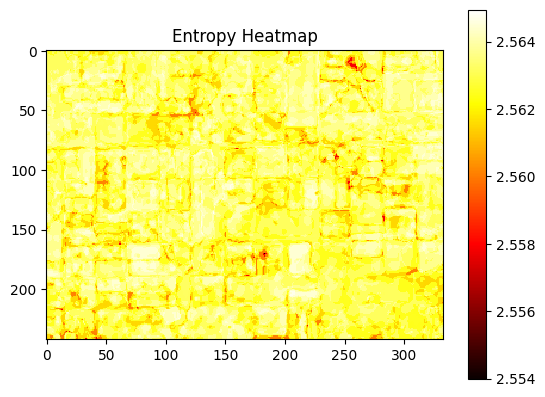

In [8]:
#calcualte entropy on all pixels and draw a heatmap
entropy_map = np.zeros((metadata['height'], metadata['width']))
for i in range(metadata['height']):
    for j in range(metadata['width']):
        pixel_logits = original_pred[:, i, j]
        normalized_logits = pixel_logits/np.sum(pixel_logits)
        pixel_probs = scipy.special.softmax(normalized_logits)
        pixel_entropy = scipy.stats.entropy(pixel_probs)
        entropy_map[i, j] = pixel_entropy
plt.imshow(entropy_map, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.title('Entropy Heatmap')
plt.show()

In [10]:
with rasterio.open('54_pred_full_original.tif') as src:
    kaz_original_pred = src.read()
    metadata = {
                'count': src.count,           # Number of bands
                'width': src.width,
                'height': src.height,
                'dtype': src.dtypes[0],
                'crs': src.crs,
                'transform': src.transform,
                'bounds': src.bounds,
                'nodata': src.nodata
            }
    print(f"✓ Loaded with rasterio: {kaz_original_pred.shape} ({metadata['dtype']})")
    print(f"  Bands: {metadata['count']}, Size: {metadata['width']}x{metadata['height']}")
    print(f"  CRS: {metadata['crs']}")

✓ Loaded with rasterio: (13, 759, 498) (uint8)
  Bands: 13, Size: 498x759
  CRS: EPSG:32643


In [12]:
with rasterio.open('usa_rotated_pred_full_original.tif') as src:
    rotated_pred = src.read()
    metadata = {
                'count': src.count,           # Number of bands
                'width': src.width,
                'height': src.height,
                'dtype': src.dtypes[0],
                'crs': src.crs,
                'transform': src.transform,
                'bounds': src.bounds,
                'nodata': src.nodata
            }
    print(f"✓ Loaded with rasterio: {rotated_pred.shape} ({metadata['dtype']})")
    print(f"  Bands: {metadata['count']}, Size: {metadata['width']}x{metadata['height']}")
    print(f"  CRS: {metadata['crs']}")

✓ Loaded with rasterio: (13, 242, 333) (uint8)
  Bands: 13, Size: 333x242
  CRS: None


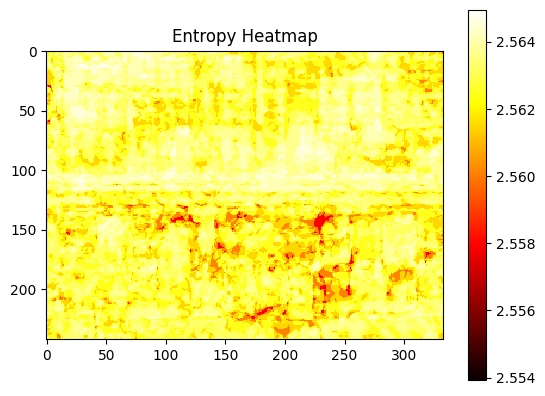

In [13]:
entropy_map = np.zeros((metadata['height'], metadata['width']))
for i in range(metadata['height']):
    for j in range(metadata['width']):
        pixel_logits = rotated_pred[:, i, j]
        normalized_logits = pixel_logits/np.sum(pixel_logits)
        pixel_probs = scipy.special.softmax(normalized_logits)
        pixel_entropy = scipy.stats.entropy(pixel_probs)
        entropy_map[i, j] = pixel_entropy
plt.imshow(entropy_map, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.title('Entropy Heatmap')
plt.show()

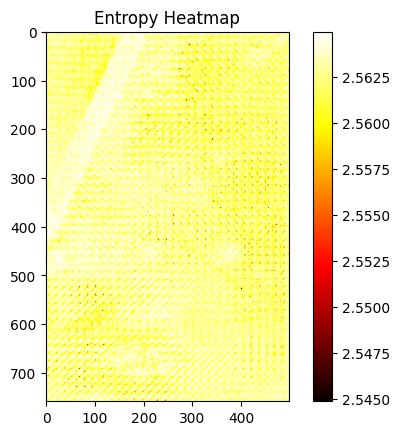

In [27]:
kaz_entropy_map = np.zeros((metadata['height'], metadata['width']))
normalized_logits = kaz_original_pred/np.sum(kaz_original_pred, axis=0)
probs = scipy.special.softmax(normalized_logits, axis=0)
kaz_entropy_map = scipy.stats.entropy(probs, axis=0)
plt.imshow(kaz_entropy_map, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.title('Entropy Heatmap')
plt.show()

In [26]:
scipy.stats.entropy(scipy.special.softmax(normalized_logits, axis=0), axis=0).shape

(759, 498)